# Báo cáo Project
Lớp TTNT-154016, Nhóm G21

## 1. Thông tin chung

### Thành viên
- Đinh Mạnh Dũng 20224959
- Nguyễn Mạnh Hùng 20224859
- Lê Trung Kiên 20225023
- Đoàn Đại Phúc 20224890
- Nguyễn Thế Phong 20224888

### Lịch thực hiện
- W02: Đăng ký nhóm (Đã xác nhận nhóm đăng ký hoặc phân công 17/9)
- W03: Đề xuất project (22/9 - các thành viên trong nhóm bắt đầu trao đổi, thực hiện project)
- W09: Báo cáo tiến độ giữa kỳ (2/11)
- W15: Hoàn thành và gửi báo cáo project (14/12)
- W16-17: Trình bày project, Q&A

## 2. Đề xuất project (W2-3)

### Bài toán
Tìm đường đi phù hợp nhất để thoát khỏi mê cung (ngắn nhất, đạt đủ nhiều yêu cầu, thử thách,..)

### Phương pháp
Sử dụng các kiến thức đã được học xây dụng thuật toán phù hợp để giải mê cung theo yêu cầu nhất định.

### Phân công
- Đinh Mạnh Dũng:Phát triển giao diện người dùng (UI)
    Nhiệm vụ:
        Xây dựng giao diện để người dùng có thể dễ dàng điều chỉnh kích thước mê cung, thêm hoặc bớt chướng ngại vật, và chọn thuật toán tìm kiếm.
        Đảm bảo giao diện trực quan và dễ thao tác, hiển thị kết quả tìm kiếm rõ ràng và dễ hiểu.
- Nguyễn Mạnh Hùng:Trực quan hóa thuật toán và xử lý đồ họa
    Nhiệm vụ:
        Thiết kế và phát triển các hiệu ứng trực quan để hiển thị đường đi mà các thuật toán tìm kiếm tìm ra.
        Thể hiện các bước thuật toán đang chạy, các ô đã duyệt, và đích đến trên mê cung một cách sinh động và rõ ràng.
- Lê Trung Kiên:Phát triển các thuật toán tìm kiếm
    Nhiệm vụ:
        Triển khai các thuật toán tìm kiếm như Breadth-First Search (BFS), A*.
        Tối ưu hóa từng thuật toán để hoạt động hiệu quả trong các tình huống mê cung khác nhau.
- Đoàn Đại Phúc:Phát triển thuật toán và cải tiến logic điều kiện ràng buộc
    Nhiệm vụ:
        Thêm các điều kiện ràng buộc vào thuật toán, chẳng hạn như hạn chế thời gian, giới hạn số bước hoặc xử lý các vùng bị cấm trong mê cung.
        Phối hợp với người phát triển thuật toán để kiểm tra độ hiệu quả của các điều kiện này và tối ưu chúng.
- Nguyễn Thế Phong:Quản lý dữ liệu và cấu hình tùy chỉnh mê cung
    Nhiệm vụ:
        Phát triển chức năng để người dùng có thể lưu lại các cấu hình mê cung và thử lại với các thuật toán khác nhau.
        Thiết kế cách quản lý và lưu trữ dữ liệu kết quả từ các lần tìm đường, giúp so sánh hiệu năng của các thuật toán trong các cấu hình khác nhau của mê cung

## 3. Tiến độ giữa kỳ (W9)

### Chương trình


#### i.Thuật toán BFS giải mê cung

In [ ]:
from queue import Queue

def bfs(maze,start,goal):
    rows = len(maze)
    cols = len(maze[0])

    came_from = {}
    visited = [[0]*cols for _ in range(rows)]
    derictions = directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    q = Queue()

    q.put((start,0)) 
    visited[start[0]][start[1]] = 1

    while not q.empty():
        current,step = q.get()

        if(current == goal):
            return re_path(maze,came_from,current)
            
        
        for d in directions:
            new = (current[0] + d[0],current[1] + d[1])

            if 0<= new[0] < cols and 0<= new[1] < rows and visited[new[0]][new[1]] == 0:
                if maze[new[0]][new[1]] == 1:
                    came_from[new] = current
                    visited[new[0]][new[1]] = 1
                    q.put((new,step + 1))
    
    return None 

def re_path(maze,came_from,current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)

    path.reverse()

    for i in path:
        maze[i[0]][i[1]] = 2

    return path


#### ii.Thuật toán A star giải mê cung 

In [ ]:
from queue import PriorityQueue




def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star_search(maze, start, goal):
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    rows = len(maze)
    cols = len(maze[0])

    open_set = PriorityQueue()
    open_set.put((0,start)) #fn va vitri

    came_from = {}
    g = {start : 0}
    f = {start : heuristic(start, goal)}

    while not open_set.empty():
        _, current = open_set.get()

        if current == goal:
            return re_path(maze,came_from, current)
        
        for d in directions:
            new = (current[0] + d[0], current[1] + d[1])

            if 0 <= new[0] < rows and 0 <= new[1] < cols and maze[new[0]][new[1]] == 1:
                new_g = g[current] + 1

                if new_g < g.get(new, float('inf')):
                    came_from[new] = current
                    g[new] = new_g
                    f[new] = new_g + heuristic(new,goal)
                    open_set.put((f[new],new))

    return None

def re_path(maze,came_from,current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)

    path.reverse()

    for i in path:
        maze[i[0]][i[1]] = 2

    return path


### Kết quả, vấn đề gặp phải


Chúng em thu được các kết quả như sau: 
- Xây dựng được một số thuật toán cơ bản giải mê cung.
- So sánh được độ hiệu quả của các thuật toán thông qua thời gian làm việc và độ dài đường đi chúng tìm được.

Dự định sắp tới:
- Thêm các điều kiện vào mê cung để các yêu cầu được đa dạng hơn.
- Tinh chỉnh các hệ số trong q_learning để phù hợp với từng dạng mê cung.
- Triển khai giải một số đường đi trong thực tế.

Vấn đề gặp phải:
- Còn những ý tưởng nào khác hiệu quả để giải mê cung ?
- Hàm heurictic trong thuật toán a_star hiện tại có đủ hiệu quả hay không ?
- Có nên áp dụng Deep Q_Network vào giải các mê cung phức tạp không?
- Làm sao để đánh giá đúng mức độ hiệu quả của mô hình cũng như so sánh chúng với nhau ?

## 4. Cập nhật kết quả cuối kỳ (W15)

## Chi tiết phương pháp, dữ liệu 
### 1. Giải mê cung cơ bản (mê cung không có trọng số, độ dài đường đi giữa hai ô cạnh nhau bất kì là như nhau).
Khi bắt đầu, chương trình sẽ yêu cầu nhập vào kích cỡ mê cung cần giải. Sau khi nhập kích thước mê cung thành công, dựa vào hàm tạo mê cung, mê cung sẽ được tạo một cách ngẫu nhiên.

*Giải thích về cơ chế tạo mê cung : Ý tưởng cơ bản của cơ chế tạo mê cung này dựa trên giải thuật DFS.<br>- Ban đầu, nhập vào một giá trị n là kích thước của mê cung. Tạo một ma trận với kích thước 2n+1, tất cả các phần tử trong ma trận đề có giá trị bằng 0, biểu thị cho tường.<br> - Bắt đầu từ vị trí (1, 1) đánh dấu vị trí này là đường đi( đường đi có gía trị là 1), cho điểm này vào stack.<br> - Chọn điểm cuối cùng được thêm vào stack, kiểm tra các hàng xóm cách hai đơn vị của điểm hiện tại theo 4 hướng( một điểm thỏa mãn là hàng xóm của điểm hiện tại nếu nó nằm trong ma trận đang xét và có giá trị bằng 0).<br> - Nếu tồn tại hàng xóm, chọn bất kì một hàng xóm của điểm hiện tại vào cho nó vào stack, khi đã chọn được hàng xóm thì kí hiệu hàng xóm đó cũng là đường đi và điểm ở giữa điểm hiện tại và hàng xóm được chọn cũng là đường đi.<br>- Nếu không tồn tại hàng xóm, xóa điểm đang xét ra khỏi hàng đợi.<br> - Lặp lại 2 bước gần nhất trên cho tới khi stack rỗng, khi đó ta không thể chọn điểm nào làm đường đi nữa và được một mê cung hoàn chỉnh, đảm bảo luôn có đường đi giữa 2 điểm bất kì nằm trong mê cung.*

**Với mê cung không trọng số nhóm có đưa ra hai hướng tiếp cận như sau :**

#### a. Tìm đường đi tối ưu từ một điểm đầu và một điểm cuối bất kì:
Chương trình khởi tạo hai mê cung cạnh nhau phục vụ việc giải 2 mê cung bằng 2 thuật toán BFS và A STAR.
- **Dữ liệu đầu vào:**<br> 
    Dữ liệu đầu vào ở đây sẽ là hai điểm đầu cuối, điểm đầu và điểm cuối sẽ được chọn bằng cách click chuật vào các ô đường đi của mê cung cho sẵn.
- **Giải thuật:**<br>
    Khi có được đầu vào là điểm đầu và điểm cuối chương trình sẽ thực hiện giải mê cung theo thuật toán mà mình đã chọn (sẽ có hai mê cung phục vụ thuật toán khác nhau, khi chọn đủ điểm đầu và cuối ở mê cung nào thì mê cung đó sẽ chạy chương trình tìm đường đi tối ưu).<br> Thuật toán tìm kiếm đường đi kết thúc, nó sẽ đưa ra lời giải tối ưu, thời gian chạy thuật toán và số bước đi cần thiết để đi từ điểm đầu đến điểm đích.

#### b. Tìm đường đi tối ưu từ điểm đầu đến điểm cuối, trên đường đi phải đi qua một tập điểm cho trước:
Chương trình tạo ra một mê cung duy nhất để giải.
- **Dữ liệu đầu vào:**<br>
    Dữ liệu đầu vào là 2 điểm đầu cuối vào tập các điểm mà bạn muốn đi qua, khi khởi động chương trình sẽ bắt nhập kích thước mê cung, sau đó đến số điểm bạn muốn đi qua. <br> Đầu tiên sử dụng con trỏ chuật click vào mê cung để chọn 2 điểm đầu cuối, sau khi chọn 2 điểm đầu cuối click tiếp để chọn các điểm muốn đi qua.
- **Giải thuật:**<br>
    Sau khi các điểm đã được lựa chọn, chương trình sẽ chạy giải thuật BFS để tìm độ dài đường đi nhỏ nhất giữa 2 điểm bất kì và lưu nó vào một mảng 2 chiều.<br> Sau khi có khoảng cách giữa các điểm, thuật toán Simulated Annealing sẽ được dùng để tìm tổng khoảng cách nhỏ nhất từ điểm đầu đi qua tất cả các điểm và kết thúc ở điểm cuối.<br> Nếu tồn tại đường đi, chương trình sẽ cho in ra thời gian chạy, số bước di chuyển và tập các điểm đã được sắp xếp để có được lời giải tối ưu.


### 2. Giải mê cung cơ bản có trọng số.

* Ý tưởng tạo mê cung có trọng số:
    - Trọng sô(weight) là một số nguyên hoặc số thực, biểu thị chi phí khi đi qua một ô trong mê cung. 
    - Người dùng có thể tùy chỉnh các trọng số này thông qua giao diện.
* Quy trình tạo trọng số:
    - Khởi tạo mặc định:
    Tất cả các ô trên lưới đều được gán một trọng số mặc định (ví dụ: 1).
    Trọng số mặc định này có thể được điều chỉnh.
    - Tương tác của người dùng:
    Khi người dùng chọn chế độ "Tạo trọng số" (Draw Weight Mode), họ có thể nhấp vào các ô trên lưới để thay đổi trọng số.
    Người dùng có thể sử dụng Spinbox để đặt giá trị trọng số mong muốn trước khi nhấp vào ô.
    - Cập nhật trọng số:
    Khi người dùng nhấp vào một ô, giá trị trọng số được gán vào ô đó dựa trên giá trị từ Spinbox.
    - Lưu trữ trọng số:
    Trọng số của từng ô được lưu trữ trong một ma trận (2D array) hoặc dictionary, nơi mỗi ô được liên kết với một tọa độ (x, y).

#### a. Tìm đường đi có chi phí nhỏ nhất với giải thuật Dijkstra trong mê cung 
Chương trình sử dụng thuật toán Dijkstra để tìm đường đi ngắn nhất giữa hai điểm trong mê cung với trọng số tương ứng với chi phí đi qua các điểm trong mê cung. 
- **Dữ liệu đầu vào:**<br>
    Kích thước ma trận, điểm đầu, điểm cuối và số điểm đi qua.
- **Giải thuật:**<br>
    Thuật toán Dijkstra giúp tìm được đường đi tối ưu có chi phí nhỏ nhất từ điểm đầu đến điểm đích trong mê cung có trọng số tương ứng với chi phí mỗi điểm.<br> Thuật toán sử dụng PriorityQueue để tối ưu hóa quá trình tìm kiếm.<br>Giải thuật phù hợp với mê cung có trọng số dương.<br>Thuật toán sẽ dừng khi tìm ra điểm đích hoặc khi đã xét hết những vị trí có thể đi mà chưa tới đích.


#### b. Tìm đường đi có chi phí nhỏ nhất từ điểm đầu đến điểm cuối trong mê cung 
Chương trình tạo ra một mê cung để giải với trọng số mỗi ô được giới hạn bởi người dùng và ô tường trọng số là 0
- **Dữ liệu đầu vào:**<br>
Dữ liệu đầu vào là điểm đầu, điểm cuối, giới hạn trọng số ở mỗi ô trong mê cung
- **Giải thuật:**<br>
Sau khi nhập input, chương trình sẽ chạy thuật toán A STAR để tìm kiếm đường đi trong mê cung. Dựa vào trọng số và khoảng cách Mahattan để ước lượng khoảng cách nhằm tìm ra hàm ước lượng chi phí tốt nhất cho mỗi hàng xóm. Nếu tồn tại đường đi chương trình sẽ in ra đường đi lời giải cho mê cung.

### Chương trình
...

### 1. Giải mê cung cơ bản (mê cung không có trọng số, độ dài đường đi giữa hai ô cạnh nhau bất kì là như nhau).
#### a. Tìm đường đi tối ưu từ một điểm đầu và một điểm cuối bất kì:
        - Thuật toán BFS

In [ ]:
def bfs(maze, start, goal, blocks=[]):
    rows = len(maze)
    cols = len(maze[0])

    came_from = {} # luu cha cua cac diem trong loi giai

    visited = [[0]*cols for _ in range(rows)]
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    q = Queue()
    qq = []
    q.put(start)
    visited[start[0]][start[1]] = 1

    while not q.empty():
        current = q.get()

        if current == goal:
            return re_path(maze, came_from, current), qq
        
        for dx, dy in directions:
            new_state = (current[0] + dx, current[1] + dy)

            if 0 <= new_state[0] < rows and 0 <= new_state[1] < cols and visited[new_state[0]][new_state[1]] == 0:
                if maze[new_state[0]][new_state[1]] != 0 and (new_state[0], new_state[1]) not in blocks:
                    came_from[new_state] = current
                    visited[new_state[0]][new_state[1]] = 1
                    q.put(new_state)
                    qq.append(new_state)
    return []

        -Thuật toán A STAR
        

In [ ]:
def heurictics(a_point, b_point):
    return abs(a_point[0]-b_point[0]) + abs(a_point[1]-b_point[1])

def a_star(maze, start, goal):
    came_from = {}
    rows = len(maze)
    cols = len(maze[0])
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    pq = PriorityQueue()
    qq = []
    pq.put((0,start))

    g = {start : 0}
    f = {start : heurictics(start, goal)}

    while not pq.empty():
        _, current = pq.get()

        if current == goal:
            return re_path(maze, came_from, current), qq

        for dx, dy in directions:
            new_state = (current[0] + dx, current[1] + dy)
            if 0 < new_state[0] < rows and 0 < new_state[1] < cols and maze[new_state[0]][new_state[1]] != 0:
                new_g = g[current] + 1

                if new_g < g.get(new_state, float('inf')):
                    came_from[new_state] = current
                    new_f = new_g + heurictics(new_state, goal)
                    f[new_state] = new_f
                    g[new_state] = new_g
                    pq.put((new_f, new_state))
                    qq.append(new_state)
    return None

#### b. Tìm đường đi tối ưu từ điểm đầu đến điểm cuối, trên đường đi phải đi qua một tập điểm cho trước:

### 2. Giải mê cung cơ bản có trọng số.

#### a. Thuật toán Dijkstra cho mê cung có trọng số

In [ ]:
from queue import PriorityQueue

def dijkstra(maze, start, goal):
    rows = len(maze)
    cols = len(maze[0])
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    
    dist = {start: 0}
    came_from = {}
    pq = PriorityQueue()
    pq.put((0, start))
    visited = set()
    qq = []

    while not pq.empty():
        current_dist, current = pq.get()
        
        if current in visited:
            continue
        
        visited.add(current)
        qq.append(current)
        
        if current == goal:
            return re_path(came_from, current), qq
        
        for dx, dy in directions:
            new_state = (current[0] + dx, current[1] + dy)
            
            if 0 <= new_state[0] < rows and 0 <= new_state[1] < cols:
                weight = maze[new_state[0]][new_state[1]]
                
                if weight != 0 and new_state not in visited:
                    new_dist = current_dist + weight
                    
                    if new_dist < dist.get(new_state, float('inf')):
                        dist[new_state] = new_dist
                        came_from[new_state] = current
                        pq.put((new_dist, new_state))

    return [], []

#### b. Thuật toán A STAR cho mê cung có trọng số

In [ ]:
def heurictics(a_point, b_point):
    return abs(a_point[0]-b_point[0]) + abs(a_point[1]-b_point[1])
def a_star_weighted(maze, start, goal):

    rows, cols = len(maze), len(maze[0])
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  


    pq = PriorityQueue()
    pq.put((0, start))  

    g = {start: 0}
    came_from = {}

    while not pq.empty():
        _, current = pq.get()  

        if current == goal:
            return re_path(maze, came_from, current)


        for dx, dy in directions:
            neighbor = (current[0] + dx, current[1] + dy)

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and maze[neighbor[0]][neighbor[1]] > 0:
                new_g = g[current] + maze[neighbor[0]][neighbor[1]]

                if neighbor not in g or new_g < g[neighbor]:
                    g[neighbor] = new_g
                    new_f = new_g + heurictics(neighbor, goal)  # f(n) = g(n) + h(n)
                    came_from[neighbor] = current
                    pq.put((new_f, neighbor)) 
    return None  


##### Toàn bộ chương trình được lưu tại [GitHub](https://github.com/kienle141204/maze_solve)

<!-- 📁 Project  
├── .idea/  
├── results/                        # Thư mục lưu kết quả khi chạy các thuật toán gần nhất  
├── src/                            # Thư mục chính chứa mã nguồn của dự án  
│   ├── __pycache__/                # File biên dịch tạm thời  
│   ├── __init__.py                 # Khởi tạo ma trận 
│   ├── main.py                     # File chính, nơi bắt đầu chương trình  
│   ├── maze_solve.py               # Chứa các giải thuật cho mê cung có và không trọng số  
│   ├── utils.py                    # Tiện ích như lưu kết quả và xử lý chung  
│   ├── visualize.py                # Biểu diễn mê cung không trọng số  
│   └── weighted_maze.py            # Biểu diễn mê cung có trọng số  
├── Project-report-G21.ipynb        # Báo cáo của nhóm  
└── README.md      -->

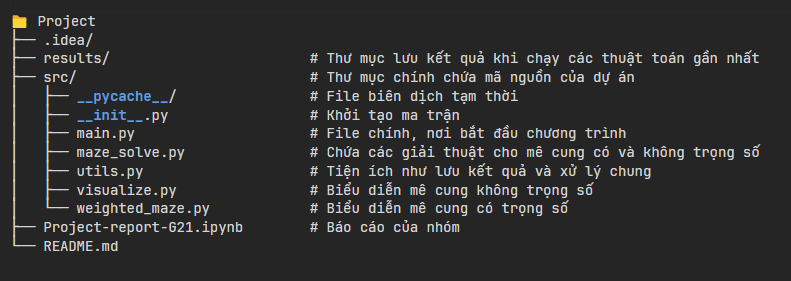


### Phân tích, đánh giá kết quả
...

### Cập nhật phân công, khối lượng công việc
<!-- công việc của các thành viên, tỷ lệ đóng góp của các thành viên -->
...